## <center>Intrusion Detection System</center>

An Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

We have used Quantum Neural Networks (QNN) to implement a fully functioning IDS model. A QNN with 0.1 rate of learning is applied and is run for 100 number of epochs and KDDCup-’99’ dataset has been used for training and benchmarking the network. For comparison purposes, the training is done on the same dataset with several other classical machine learning algorithms and QNN of 4 layers ranging from Dense to Activation.

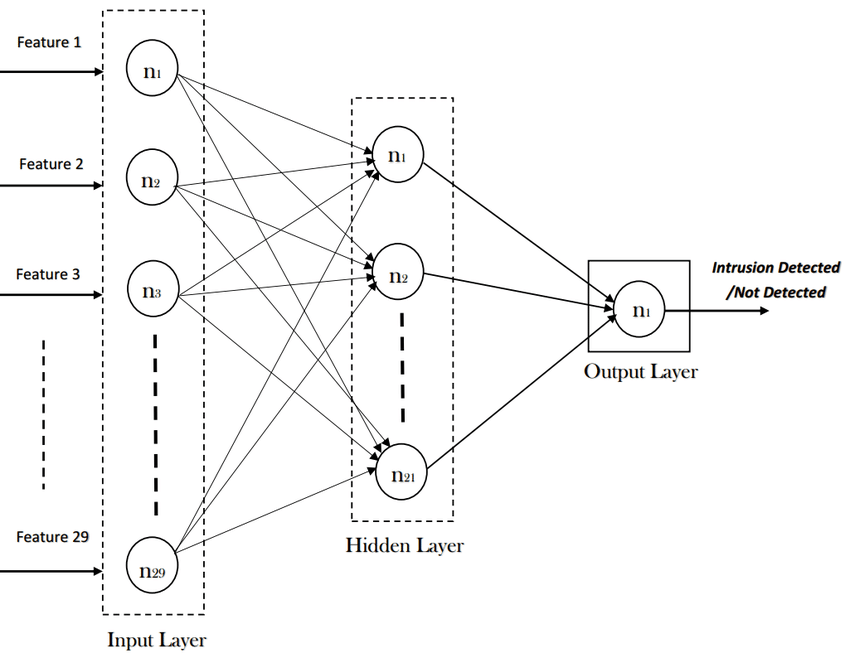


As seen from the diagram above , we have also implemented an IDS with one hidden layer.

### 1. Installing modules for quantum data


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 K

### 2. Importing packages from modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from torchsummary import summary

import qiskit
from qiskit.visualization import *

In [4]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [5]:
use_cuda = torch.cuda.is_available()

if use_cuda:
    device = torch.device('cuda')
    print('Training on GPU...')
else:
    device = torch.device('cpu')
    print('Training on CPU...')

Training on CPU...


### 3. Uploading data for training and testing data
Columns 1 to 8 contain intrinsic features
24 to 42 have derived features

In [6]:
train_url="https://raw.githubusercontent.com/rahulvigneswaran/Intrusion-Detection-Systems/master/kddtrain.csv"
test_url="https://raw.githubusercontent.com/rahulvigneswaran/Intrusion-Detection-Systems/master/kddtest.csv"
traindata = pd.read_csv(train_url, header=None)
testdata = pd.read_csv(test_url, header=None)


X = traindata.drop(traindata.iloc[:,9:23],axis=1)
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.drop(testdata.iloc[:,9:23],axis=1)

In [7]:
print(X)

        0   1   2   3   4    5     6   7   8   23  ...  32   33   34   35  \
0        0   0   1   1   1  181  5450   0   0   8  ...   9    9  1.0  0.0   
1        0   0   1   1   1  239   486   0   0   8  ...  19   19  1.0  0.0   
2        0   0   1   1   1  235  1337   0   0   8  ...  29   29  1.0  0.0   
3        0   0   1   1   1  219  1337   0   0   6  ...  39   39  1.0  0.0   
4        0   0   1   1   1  217  2032   0   0   6  ...  49   49  1.0  0.0   
...     ..  ..  ..  ..  ..  ...   ...  ..  ..  ..  ...  ..  ...  ...  ...   
494016   0   0   1   1   1  310  1881   0   0   4  ...  86  255  1.0  0.0   
494017   0   0   1   1   1  282  2286   0   0   6  ...   6  255  1.0  0.0   
494018   0   0   1   1   1  203  1200   0   0   6  ...  16  255  1.0  0.0   
494019   0   0   1   1   1  291  1200   0   0   6  ...  26  255  1.0  0.0   
494020   0   0   1   1   1  219  1234   0   0   6  ...   6  255  1.0  0.0   

          36    37    38    39   40   41  
0       0.11  0.00  0.00  0.00  

In [8]:
trainX = np.array(X)
testT= np.array(T)

trainX.astype(float)
testT.astype(float)

scaler = Normalizer().fit(trainX)
trainX = scaler.transform(trainX)

scaler = Normalizer().fit(testT)
testT = scaler.transform(testT)

y_train = np.array(Y)
y_test = np.array(C)


X_train = np.array(trainX)
X_test = np.array(testT)


batch_size = 100

In [9]:
print("Number of Input Features:",X_train.shape[1])

Number of Input Features: 28


In [10]:
labels=set(Y)
labels

{0, 1}

Thus, our dataset classifies the event as Attack or Normal

### 4. Defining 'evaluate' and 'gradient' functions for the Model

In [ ]:
def evaluate(weights, data):
    outputs = []
    qubits=[]
    for x in data:    
        logicQuBit  = LogicQuBit(X_train.shape[1])

        for i in range(X_train.shape[1]):
          qubits.append(Qubit())

        for i in range(X_train.shape[1]):
          qubits[i].H()
        
        #encoding
        for i in range(X_train.shape[1]):
          qubits[i].RZ(x[i])

        # weights
        for i in range(X_train.shape[1]):
          qubits[i].RY(weights[i])

        for i in range(X_train.shape[1]-1):
          qubits[i+1].CX(qubits[i])

        for i in range(X_train.shape[1]):
          qubits[i].RY(weights[i+X_train.shape[1]])
        
        for i in range(X_train.shape[1]-1):
          qubits[i+1].CX(qubits[i])

        # bias
        qubits[X_train.shape[1]-1].RY(weights[X_train.shape[1]*2])

        result = logicQuBit.Measure([qubits[X_train.shape[1]-1]])
        value = result[1].real
        outputs.append(value)
    return np.array(outputs)

In [ ]:
def gradient(weights, x, y, y_pred):
    n_samples = x.shape[0]
    n_weights = weights.shape[0]
    shift = pi/2
    cross_entropy_deriv = (y_pred - y)/(y_pred*(1-y_pred) + 1e-15)
    grad = np.zeros((n_weights, n_samples))
    
    for i in range(n_weights):
        #parameter shift rule
        shift_vect = np.array([shift if j==i else 0 for j in range(n_weights)])
        shift_right = weights + shift_vect
        shift_left = weights - shift_vect
        
        expectation_right = evaluate(shift_right, x)
        expectation_left = evaluate(shift_left, x)

        grad[i] = expectation_right - expectation_left

    gradients = 1.0/n_samples * grad.dot(cross_entropy_deriv) #inner product
    return gradients

In [ ]:
weights = np.random.uniform(-np.pi, np.pi, 84)

### 5. Defining the network and using Optimizers

In [11]:
model = Sequential()
model.add(Dense(1024,input_dim=28,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              29696     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 30,721
Trainable params: 30,721
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/dnn1layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('kddresults/dnn1layer/training_set_dnnanalysis.csv',separator=',', append=False)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=50, callbacks=[checkpointer,csv_logger])
model.save("kddresults/dnn1layer/dnn1layer_model.hdf5")

Epoch 1/50
4938/4941 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9914
Epoch 1: loss improved from inf to 0.02365, saving model to kddresults/dnn1layer/checkpoint-01.hdf5
4941/4941 [==============================] - 29s 6ms/step - loss: 0.0237 - accuracy: 0.9914
Epoch 2/50
4941/4941 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9973
Epoch 2: loss improved from 0.02365 to 0.00960, saving model to kddresults/dnn1layer/checkpoint-02.hdf5
4941/4941 [==============================] - 30s 6ms/step - loss: 0.0096 - accuracy: 0.9973
Epoch 3/50
4936/4941 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9977
Epoch 3: loss improved from 0.00960 to 0.00740, saving model to kddresults/dnn1layer/checkpoint-03.hdf5
4941/4941 [==============================] - 27s 5ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 4/50
4937/4941 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9980
Epoch 4: loss improved f

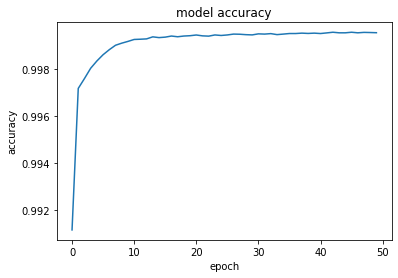

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

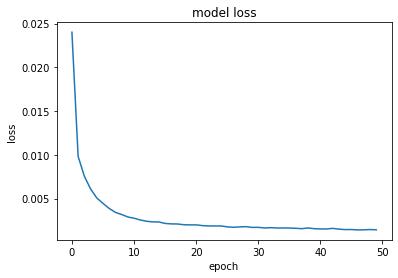

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### 4. Testing the above defined model on KDD99 Dataset

In [ ]:
from keras.models import load_model
model = load_model("kddresults/dnn1layer/dnn1layer_model.hdf5")

In [ ]:
import pandas as pd
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)


y_pred=model.predict(X_test)

for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i]=1
  else:
    y_pred[i]=0

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred , average="binary")
precision = precision_score(y_test, y_pred , average="binary")
f1 = f1_score(y_test, y_pred, average="binary")
classification=classification_report(y_test,y_pred)

print("Model Results : ")
print("Accuracy : %.3f" %accuracy)
print("Precision : %.3f" %precision)
print("Recall : %.3f" %recall)
print("F1score : %3f"%f1)
print("------------------------------")
print(classification)

9720/9720 [==============================] - 20s 2ms/step
Model Results : 
Accuracy : 0.931
Precision : 0.999
Recall : 0.915
F1score : 0.955227
------------------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     60593
           1       1.00      0.91      0.96    250436

    accuracy                           0.93    311029
   macro avg       0.87      0.96      0.90    311029
weighted avg       0.95      0.93      0.93    311029



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
%cp kddresults/dnn1layer/dnn1layer_model.hdf5 /content/gdrive/My\ Drive

### Testing the Model on Packets Captured using Sniffer

In [14]:
from google.colab import files
uploaded=files.upload()

Saving output.csv to output.csv


In [15]:
trial_data=pd.read_csv("output.csv",header=None)
trial_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,1,36,13,124,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,2,13,60,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2,13,126,0,0,0,0,1,...,1,1,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0,1,36,13,54,0,0,0,0,1,...,1,1,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,4,2,1,1,158,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1,36,13,468,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,2,1,1,79,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
trial = np.array(trial_data)
trial.astype(float)


scaler = Normalizer().fit(trial)
trial = scaler.transform(trial)

X_trial = np.array(trial)
X_trial

array([[0.        , 0.00770554, 0.2773995 , 0.10017204, 0.95548716,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.01627793, 0.03255585, 0.21161303, 0.97667552,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.00789183, 0.01578367, 0.10259384, 0.99437108,
        0.        , 0.        , 0.        , 0.        , 0.00789183,
        0.00789183, 0.        , 0.        , 0.        , 0.        ,
        0.00789183, 0.    

In [17]:
y_pred=model.predict(X_trial)

for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i]=1
  else:
    y_pred[i]=0
  print(y_pred[i])

1/1 [==============================] - 0s 205ms/step
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]


As seen above , the results for testing of model against predicted and expected KDD99 Datasets is 93% with a precision of 99%